In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# New section

In [ ]:
data=pd.read_csv("/content/creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
data.shape

(160580, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,160579.000000,160580.000000,160579.000000
mean,87.343062,57480.545242,0.002217
std,245.159473,24648.739896,0.047033
min,0.000000,0.000000,0.000000
25%,5.450000,40115.750000,0.000000
50%,21.500000,58415.500000,0.000000
75%,76.710000,75826.250000,0.000000
max,19656.530000,113472.000000,1.000000


In [ ]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [ ]:
a=data.dropna(axis=0)
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160574,113469.0,1.977569,-1.266205,-0.649009,-0.914577,-1.014584,-0.117451,-1.035486,0.058460,-0.149023,...,0.418268,1.046292,0.095034,0.805221,-0.194471,-0.152012,-0.012784,-0.037054,89.99,0.0
160575,113471.0,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0.0
160576,113471.0,2.027248,-0.123314,-3.187138,-0.603106,2.685489,3.011201,-0.370792,0.722885,0.439019,...,0.198270,0.607648,0.011628,0.637274,0.286212,-0.081426,0.014987,-0.036266,12.14,0.0
160577,113471.0,-0.904898,1.131663,2.877922,4.645120,-0.684800,2.522137,-1.218386,1.178994,-0.383132,...,0.039884,0.559305,-0.438575,-0.960073,0.329436,0.739082,0.314542,0.086706,12.91,0.0


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160579 entries, 0 to 160578
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    160579 non-null  float64
 1   V1      160579 non-null  float64
 2   V2      160579 non-null  float64
 3   V3      160579 non-null  float64
 4   V4      160579 non-null  float64
 5   V5      160579 non-null  float64
 6   V6      160579 non-null  float64
 7   V7      160579 non-null  float64
 8   V8      160579 non-null  float64
 9   V9      160579 non-null  float64
 10  V10     160579 non-null  float64
 11  V11     160579 non-null  float64
 12  V12     160579 non-null  float64
 13  V13     160579 non-null  float64
 14  V14     160579 non-null  float64
 15  V15     160579 non-null  float64
 16  V16     160579 non-null  float64
 17  V17     160579 non-null  float64
 18  V18     160579 non-null  float64
 19  V19     160579 non-null  float64
 20  V20     160579 non-null  float64
 21  V21     16

In [ ]:
a.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
a.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
mid=data.median()
mid

Time      58415.500000
V1           -0.232236
V2            0.120630
V3            0.675769
V4            0.147207
V5           -0.253136
V6           -0.194186
V7           -0.041671
V8            0.064074
V9           -0.083914
V10          -0.116874
V11           0.140250
V12           0.109794
V13           0.040231
V14           0.102034
V15           0.271505
V16           0.061957
V17          -0.009814
V18          -0.054852
V19          -0.027980
V20          -0.033688
V21          -0.059066
V22          -0.079427
V23          -0.039814
V24           0.062089
V25           0.149179
V26          -0.060187
V27           0.009761
V28           0.022106
Amount       21.500000
Class         0.000000
dtype: float64

In [ ]:
data.fillna(mid)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160575,113471.0,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0.0
160576,113471.0,2.027248,-0.123314,-3.187138,-0.603106,2.685489,3.011201,-0.370792,0.722885,0.439019,...,0.198270,0.607648,0.011628,0.637274,0.286212,-0.081426,0.014987,-0.036266,12.14,0.0
160577,113471.0,-0.904898,1.131663,2.877922,4.645120,-0.684800,2.522137,-1.218386,1.178994,-0.383132,...,0.039884,0.559305,-0.438575,-0.960073,0.329436,0.739082,0.314542,0.086706,12.91,0.0
160578,113472.0,1.997105,0.449015,-2.478946,1.430360,1.144331,-0.773339,0.717322,-0.334020,0.109623,...,-0.039439,0.042502,-0.056210,0.297646,0.518700,-0.507040,-0.005483,-0.019878,35.95,0.0


persentage of total not fraud transaction

In [ ]:
nfcount=0
notfraud=a['Class']
for i in range (len(notfraud)):
  if notfraud[i]==0:
    nfcount= nfcount+1

nfcount

160223

In [ ]:
per_nf=(nfcount/len(notfraud))*100
per_nf

99.77830226866527

persentage of total fraud tranction

In [ ]:
fcount=0
fraud=a['Class']
for i in range(len(fraud)):
  if fraud[i]==1:
    fcount=fcount+1

fcount



356

In [ ]:
per_f=(fcount/len(notfraud))*100
per_f

0.22169773133473245

In [ ]:
plot_data=pd.DataFrame()
plot_data['fraud tranction']=fraud
plot_data['geniue tranction']=notfraud
plot_data

,fraud tranction,geniue tranction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
160574,0.0,0.0
160575,0.0,0.0
160576,0.0,0.0
160577,0.0,0.0


<Axes: title={'center': 'bar plot for fraud vs Genuine tranction'}, xlabel='fraud tranction', ylabel='geniue tranction'>

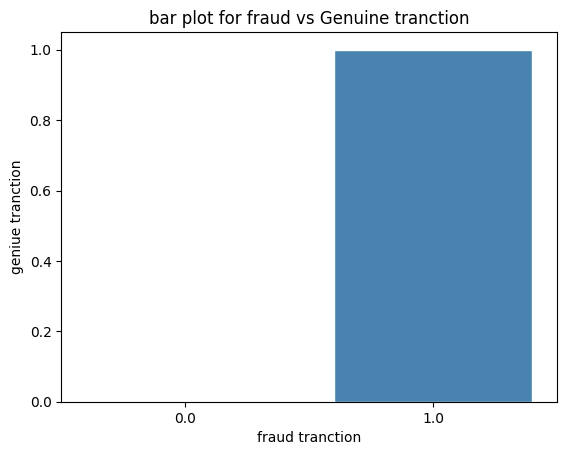

In [ ]:
plt.title("bar plot for fraud vs Genuine tranction")
sns.barplot(x='fraud tranction',y='geniue tranction',data=plot_data, palette='Blues' , edgecolor='w'  )

Text(0.5, 1.0, 'time vs amount')

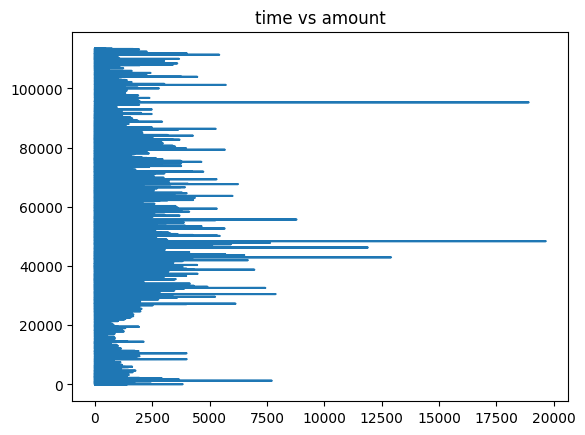

In [ ]:
x=a['Amount']
y=a['Time']
plt.plot(x,y)
plt.title('time vs amount')

<ipython-input-88-2da749e45ebe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['Amount'],color='red')


<Axes: title={'center': 'amount distributon'}, xlabel='Amount', ylabel='Density'>

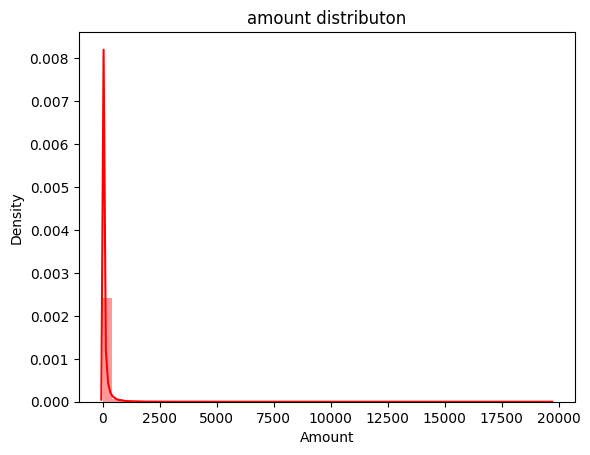

In [ ]:
plt.title('amount distributon')
sns.distplot(a['Amount'],color='red')

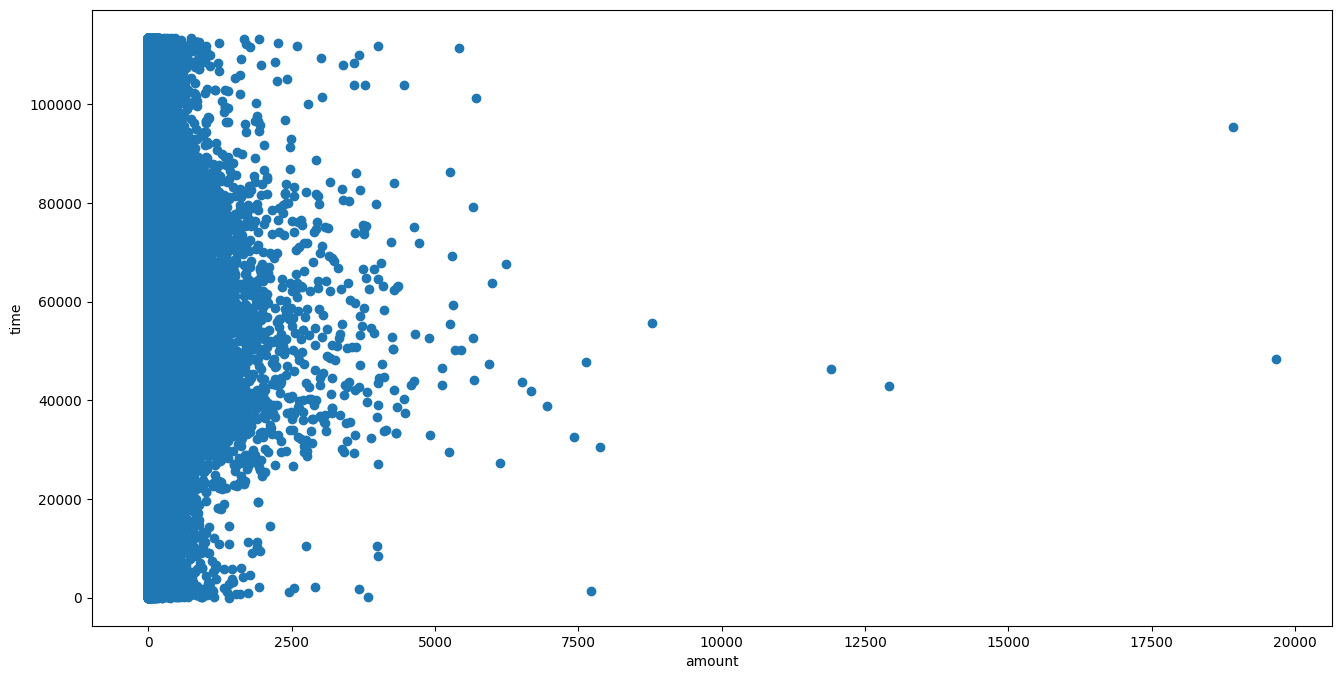

In [ ]:
fig ,ax=plt.subplots(figsize=(16,8))
ax.scatter (a['Amount'],a['Time'])
ax.set_xlabel('amount')
ax.set_ylabel('time')
plt.show()

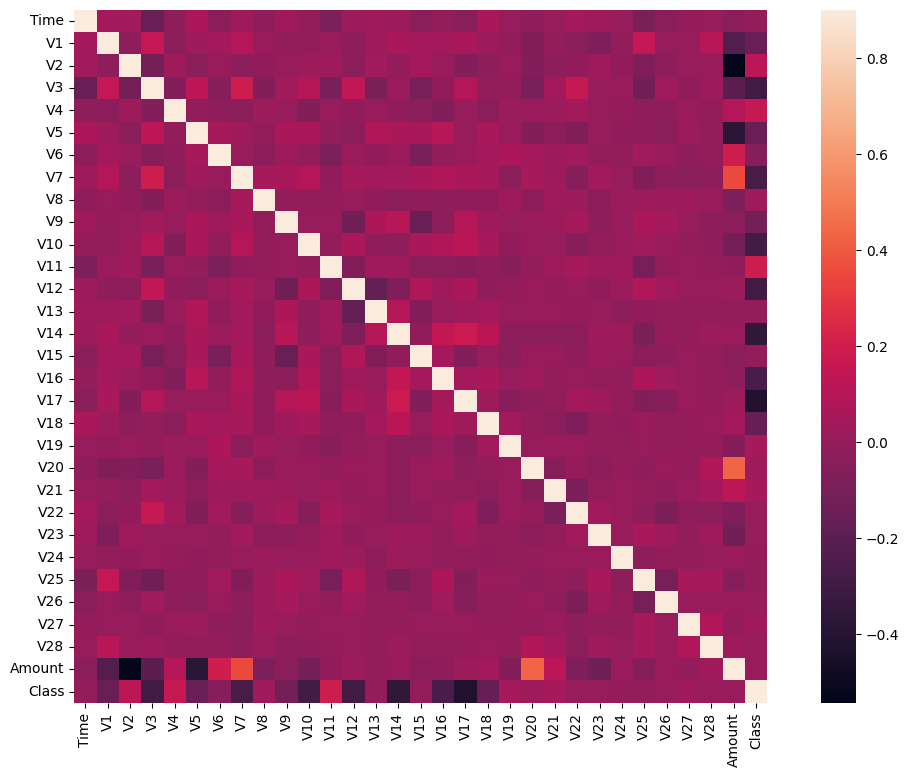

In [ ]:
#corelation matrix
corelation_matrix=a.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(corelation_matrix, vmax=.9 , square=True)
plt.show()

training and testing

In [ ]:
x=a.drop(['Class'],axis =1)
y=a['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_test.shape

(32116, 30)

In [ ]:
y_test.shape

(32116,)

In [ ]:
x_train.shape

(128463, 30)

In [ ]:
y_train.shape

(128463,)

In [ ]:
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lreg.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy=lreg.score(x_test,y_test)
accuracy

0.9986611034998132

In [ ]:
confusion_matrix(y_test,y_pred)

array([[32026,    17],
       [   26,    47]])

Accuracy calculation


In [ ]:
accuracy=(accuracy*100,'%')
accuracy

(((99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.86611034998131,
   '%',
   99.8661